# The Basics


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cleanedData.csv")

In [3]:
data.head()

,vin,year,make,model,trim,body,transmission,odometer,condition,color,interior,state,seller,mmr,sellingprice,saledate
0,5xyktca69fg566472,2015,Kia,Sorento,LX,SUV,Automatic,16639.0,10.0,white,black,California,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,5xyktca69fg561319,2015,Kia,Sorento,LX,SUV,Automatic,9393.0,10.0,white,beige,California,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,wba3c1c51ek116351,2014,BMW,3 Series,328i SULEV,Sedan,Automatic,1331.0,90.0,gray,black,California,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,Automatic,14282.0,82.0,white,black,California,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,wba6b2c57ed129731,2014,BMW,6 Series Gran Coupe,650i,Sedan,Automatic,2641.0,86.0,gray,black,California,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Numerical Features


In [4]:
data.describe()

,year,odometer,condition,mmr,sellingprice
count,543202.000000,543202.000000,543202.000000,543202.000000,543202.000000
mean,2010.151914,67468.734727,61.697302,13882.395591,13733.141292
std,3.874346,52651.657719,26.395011,9598.528797,9663.147525
min,1990.000000,0.000000,2.000000,0.000000,0.000000
25%,2008.000000,28252.000000,48.000000,7350.000000,7100.000000
50%,2012.000000,51348.500000,68.000000,12400.000000,12300.000000
75%,2013.000000,97690.000000,82.000000,18400.000000,18300.000000
max,2015.000000,999999.000000,98.000000,182000.000000,230000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543202 entries, 0 to 543201
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           543202 non-null  object 
 1   year          543202 non-null  int64  
 2   make          543202 non-null  object 
 3   model         543202 non-null  object 
 4   trim          543202 non-null  object 
 5   body          543202 non-null  object 
 6   transmission  543202 non-null  object 
 7   odometer      543202 non-null  float64
 8   condition     543202 non-null  float64
 9   color         543202 non-null  object 
 10  interior      543202 non-null  object 
 11  state         543202 non-null  object 
 12  seller        543202 non-null  object 
 13  mmr           543202 non-null  float64
 14  sellingprice  543202 non-null  float64
 15  saledate      543202 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 66.3+ MB


In [6]:
data_num = data[["year", "odometer", "condition", "mmr", "sellingprice"]]

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'mmr'}>],
       [<Axes: title={'center': 'sellingprice'}>, <Axes: >]], dtype=object)

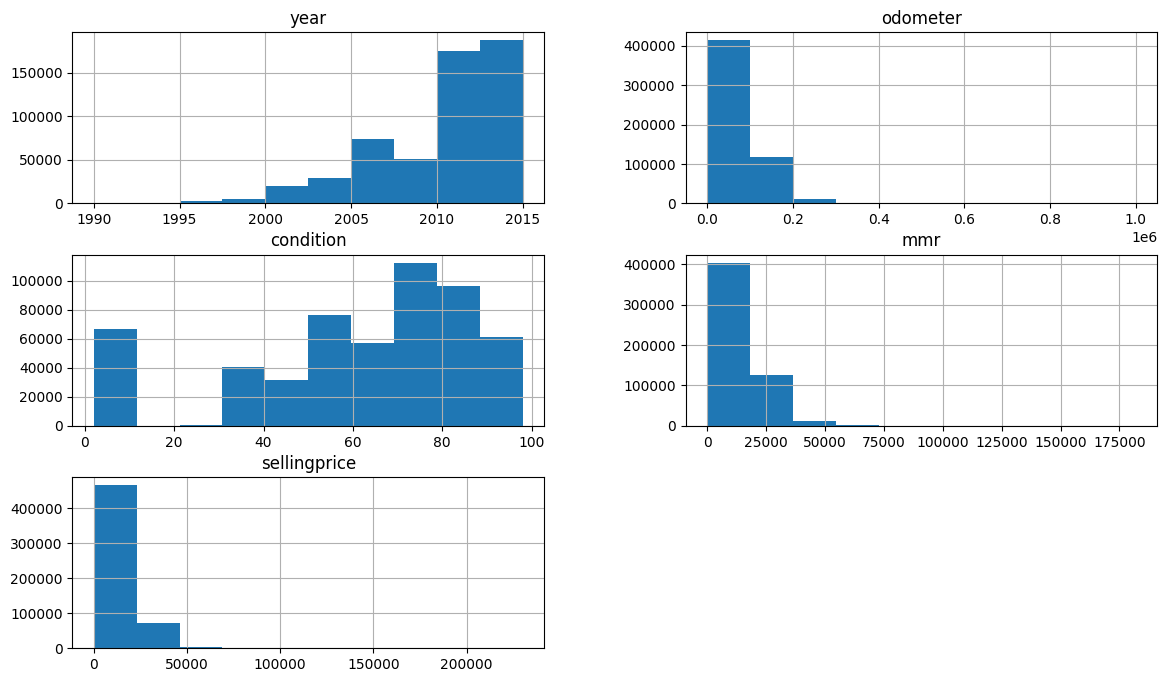

In [7]:
data_num.hist(figsize=(14, 8))

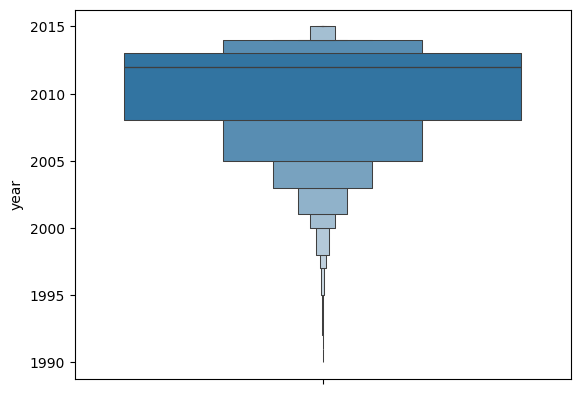

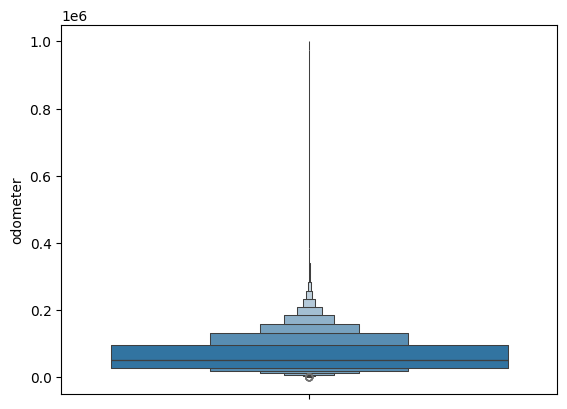

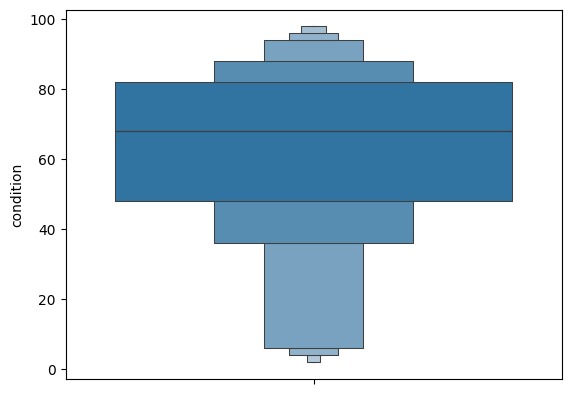

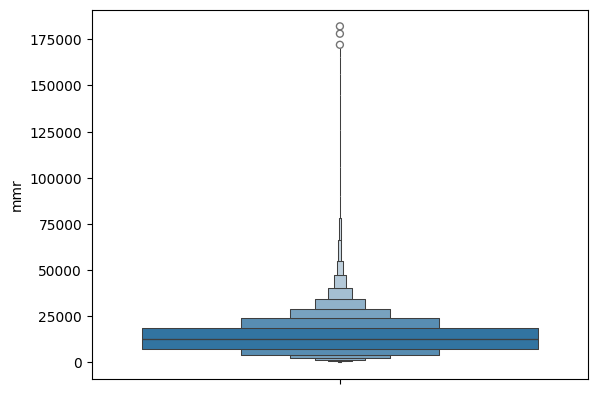

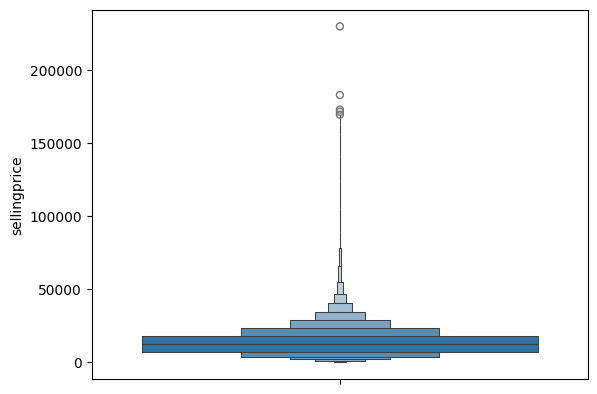

In [8]:
for col in data_num.columns:
    plt.figure()
    sns.boxenplot(data[col])

## Exploring specific features


(np.float64(-1.0999998508949524),
 np.float64(1.0999999928997597),
 np.float64(-1.099999992470289),
 np.float64(1.0999998835517093))

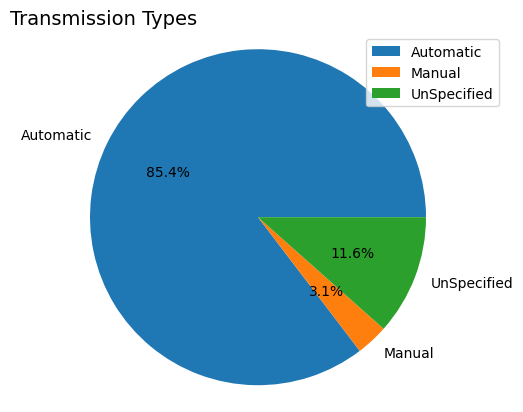

In [9]:
transmissionTypes = data["vin"].groupby(data["transmission"]).count()
plt.pie(
    transmissionTypes,
    labels=transmissionTypes.index,
    autopct="%1.1f%%",
    textprops=dict(color="black"),
)
plt.legend()
plt.title("Transmission Types", fontsize=14, loc="left")
plt.axis("equal")

<Axes: xlabel='make'>

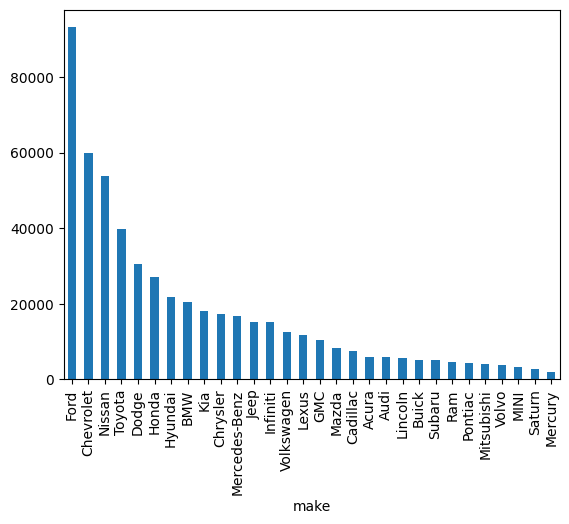

In [10]:
data["vin"].groupby(data["make"]).count().sort_values(ascending=False)[:30].plot(
    kind="bar"
)

<Axes: xlabel='body'>

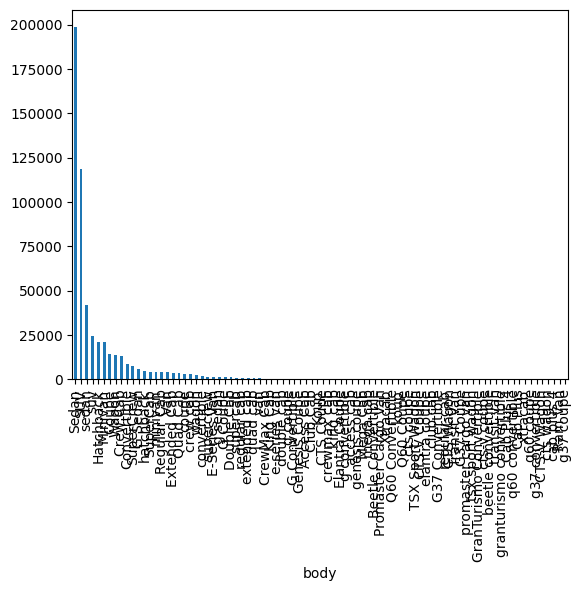

In [11]:
data["sellingprice"].groupby(data["body"]).count().sort_values(ascending=False).plot(
    kind="bar"
)

In [12]:
data["body"].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

There are too many body types, however on closer inspection, many different values of this feature represent the same (or very similar) body type. So I would map similar body types under one unit to reduce redundancy.


In [13]:
body_mapping = {
    "SUV": "SUV",
    "Sedan": "Sedan",
    "Convertible": "Convertible",
    "Coupe": "Coupe",
    "Wagon": "Wagon",
    "Hatchback": "Hatchback",
    "Crew Cab": "Truck",
    "G Coupe": "Coupe",
    "G Sedan": "Sedan",
    "Elantra Coupe": "Coupe",
    "Genesis Coupe": "Coupe",
    "Minivan": "Minivan",
    "Van": "Van",
    "Double Cab": "Truck",
    "CrewMax Cab": "Truck",
    "Access Cab": "Truck",
    "King Cab": "Truck",
    "SuperCrew": "Truck",
    "CTS Coupe": "Coupe",
    "Extended Cab": "Truck",
    "E-Series Van": "Van",
    "SuperCab": "Truck",
    "Regular Cab": "Truck",
    "G Convertible": "Convertible",
    "Koup": "Coupe",
    "Quad Cab": "Truck",
    "CTS-V Coupe": "Coupe",
    "sedan": "Sedan",
    "G37 Convertible": "Convertible",
    "Club Cab": "Truck",
    "Xtracab": "Truck",
    "Q60 Convertible": "Convertible",
    "CTS Wagon": "Wagon",
    "convertible": "Convertible",
    "G37 Coupe": "Coupe",
    "Mega Cab": "Truck",
    "Cab Plus 4": "Truck",
    "Q60 Coupe": "Coupe",
    "Cab Plus": "Truck",
    "Beetle Convertible": "Convertible",
    "TSX Sport Wagon": "Wagon",
    "Promaster Cargo Van": "Van",
    "GranTurismo Convertible": "Convertible",
    "CTS-V Wagon": "Wagon",
    "Ram Van": "Van",
    "minivan": "Minivan",
    "suv": "SUV",
    "Transit Van": "Van",
    "van": "Van",
    "regular-cab": "Truck",
    "g sedan": "Sedan",
    "g coupe": "Coupe",
    "hatchback": "Hatchback",
    "king cab": "Truck",
    "supercrew": "Truck",
    "g convertible": "Convertible",
    "coupe": "Coupe",
    "crew cab": "Truck",
    "wagon": "Wagon",
    "double cab": "Truck",
    "e-series van": "Van",
    "regular cab": "Truck",
    "quad cab": "Truck",
    "g37 convertible": "Convertible",
    "supercab": "Truck",
    "extended cab": "Truck",
    "crewmax cab": "Truck",
    "genesis coupe": "Coupe",
    "access cab": "Truck",
    "mega cab": "Truck",
    "xtracab": "Truck",
    "beetle convertible": "Convertible",
    "cts coupe": "Coupe",
    "koup": "Coupe",
    "club cab": "Truck",
    "elantra coupe": "Coupe",
    "q60 coupe": "Coupe",
    "cts-v coupe": "Coupe",
    "transit van": "Van",
    "granturismo convertible": "Convertible",
    "tsx sport wagon": "Wagon",
    "promaster cargo van": "Van",
    "q60 convertible": "Convertible",
    "g37 coupe": "Coupe",
    "cab plus 4": "Truck",
    "cts wagon": "Wagon",
}

data["body"] = data["body"].map(body_mapping)

In [14]:
data["body"].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Truck', 'Minivan', 'Van'], dtype=object)

<Axes: xlabel='body'>

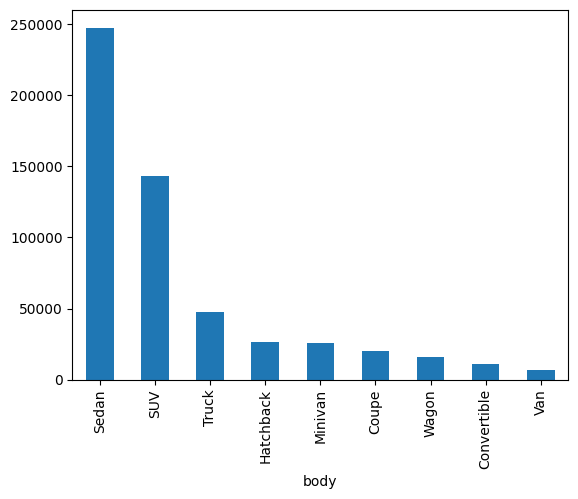

In [15]:
data["sellingprice"].groupby(data["body"]).count().sort_values(ascending=False).plot(
    kind="bar"
)

Much better...


In [16]:
data[["vin", "color"]].groupby("color").count().sort_values(ascending=False, by="vin")

,vin
color,
black,108336
white,103330
gray,81322
silver,81222
blue,49598
red,42395
UnSpecified,24414
gold,10826
green,10729


In [17]:
data[["vin", "interior"]].groupby("interior").count().sort_values(
    ascending=False, by="vin"
)

,vin
interior,
black,239666
gray,172888
beige,58102
tan,42626
UnSpecified,16208
brown,8382
red,1309
silver,1063
blue,1031


([<matplotlib.axis.YTick at 0x7fc5b6db2570>,
 [Text(0, 0, 'Ford Escape'),
  Text(0, 1, 'Ferrari 458 Italia'),
  Text(0, 2, 'Mercedes-Benz S-Class'),
  Text(0, 3, 'Rolls-Royce Ghost'),
  Text(0, 4, 'Rolls-Royce Ghost'),
  Text(0, 5, 'Rolls-Royce Ghost'),
  Text(0, 6, 'Rolls-Royce Ghost'),
  Text(0, 7, 'BMW i8'),
  Text(0, 8, 'Rolls-Royce Ghost'),
  Text(0, 9, 'Bentley Continental GTC'),
  Text(0, 10, 'BMW i8'),
  Text(0, 11, 'BMW i8'),
  Text(0, 12, 'BMW i8'),
  Text(0, 13, 'Bentley Continental GTC'),
  Text(0, 14, 'BMW i8'),
  Text(0, 15, 'Porsche 911'),
  Text(0, 16, 'Mercedes-Benz SLS AMG GT'),
  Text(0, 17, 'Ferrari California'),
  Text(0, 18, 'Rolls-Royce Ghost'),
  Text(0, 19, 'Bentley Flying Spur'),
  Text(0, 20, 'Ferrari California'),
  Text(0, 21, 'Bentley Flying Spur'),
  Text(0, 22, 'Porsche 911'),
  Text(0, 23, 'Rolls-Royce Ghost'),
  Text(0, 24, 'Rolls-Royce Ghost'),
  Text(0, 25, 'Rolls-Royce Ghost'),
  Text(0, 26, 'Ferrari California'),
  Text(0, 27, 'Rolls-Royce Ghost'),

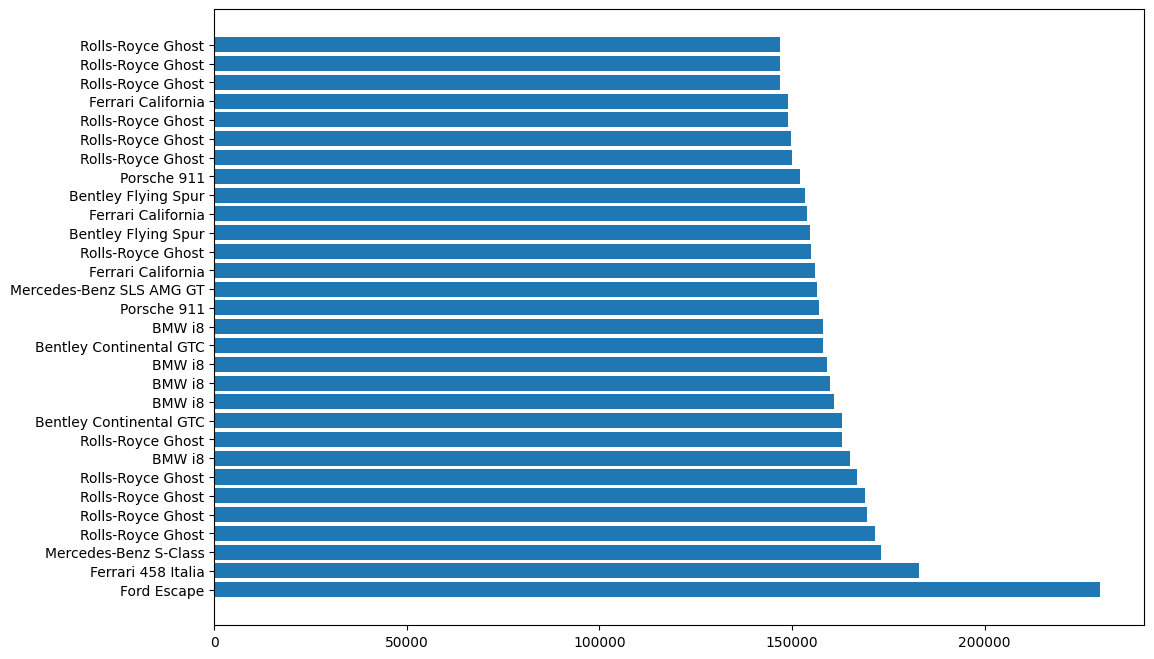

In [18]:
ExpensiveDeals = (
    data[["vin", "make", "model", "sellingprice"]]
    .sort_values(by="sellingprice", ascending=False)
    .head(30)
)

y_tick_labels = [
    f"{ExpensiveDeals.loc[row, 'make']} {ExpensiveDeals.loc[row, 'model']}"
    for row in ExpensiveDeals.index
]

plt.figure(figsize=(12, 8))

plt.barh(data=ExpensiveDeals, width="sellingprice", y="vin")

current_ticks = plt.yticks()[0]

plt.yticks(ticks=current_ticks, labels=y_tick_labels)

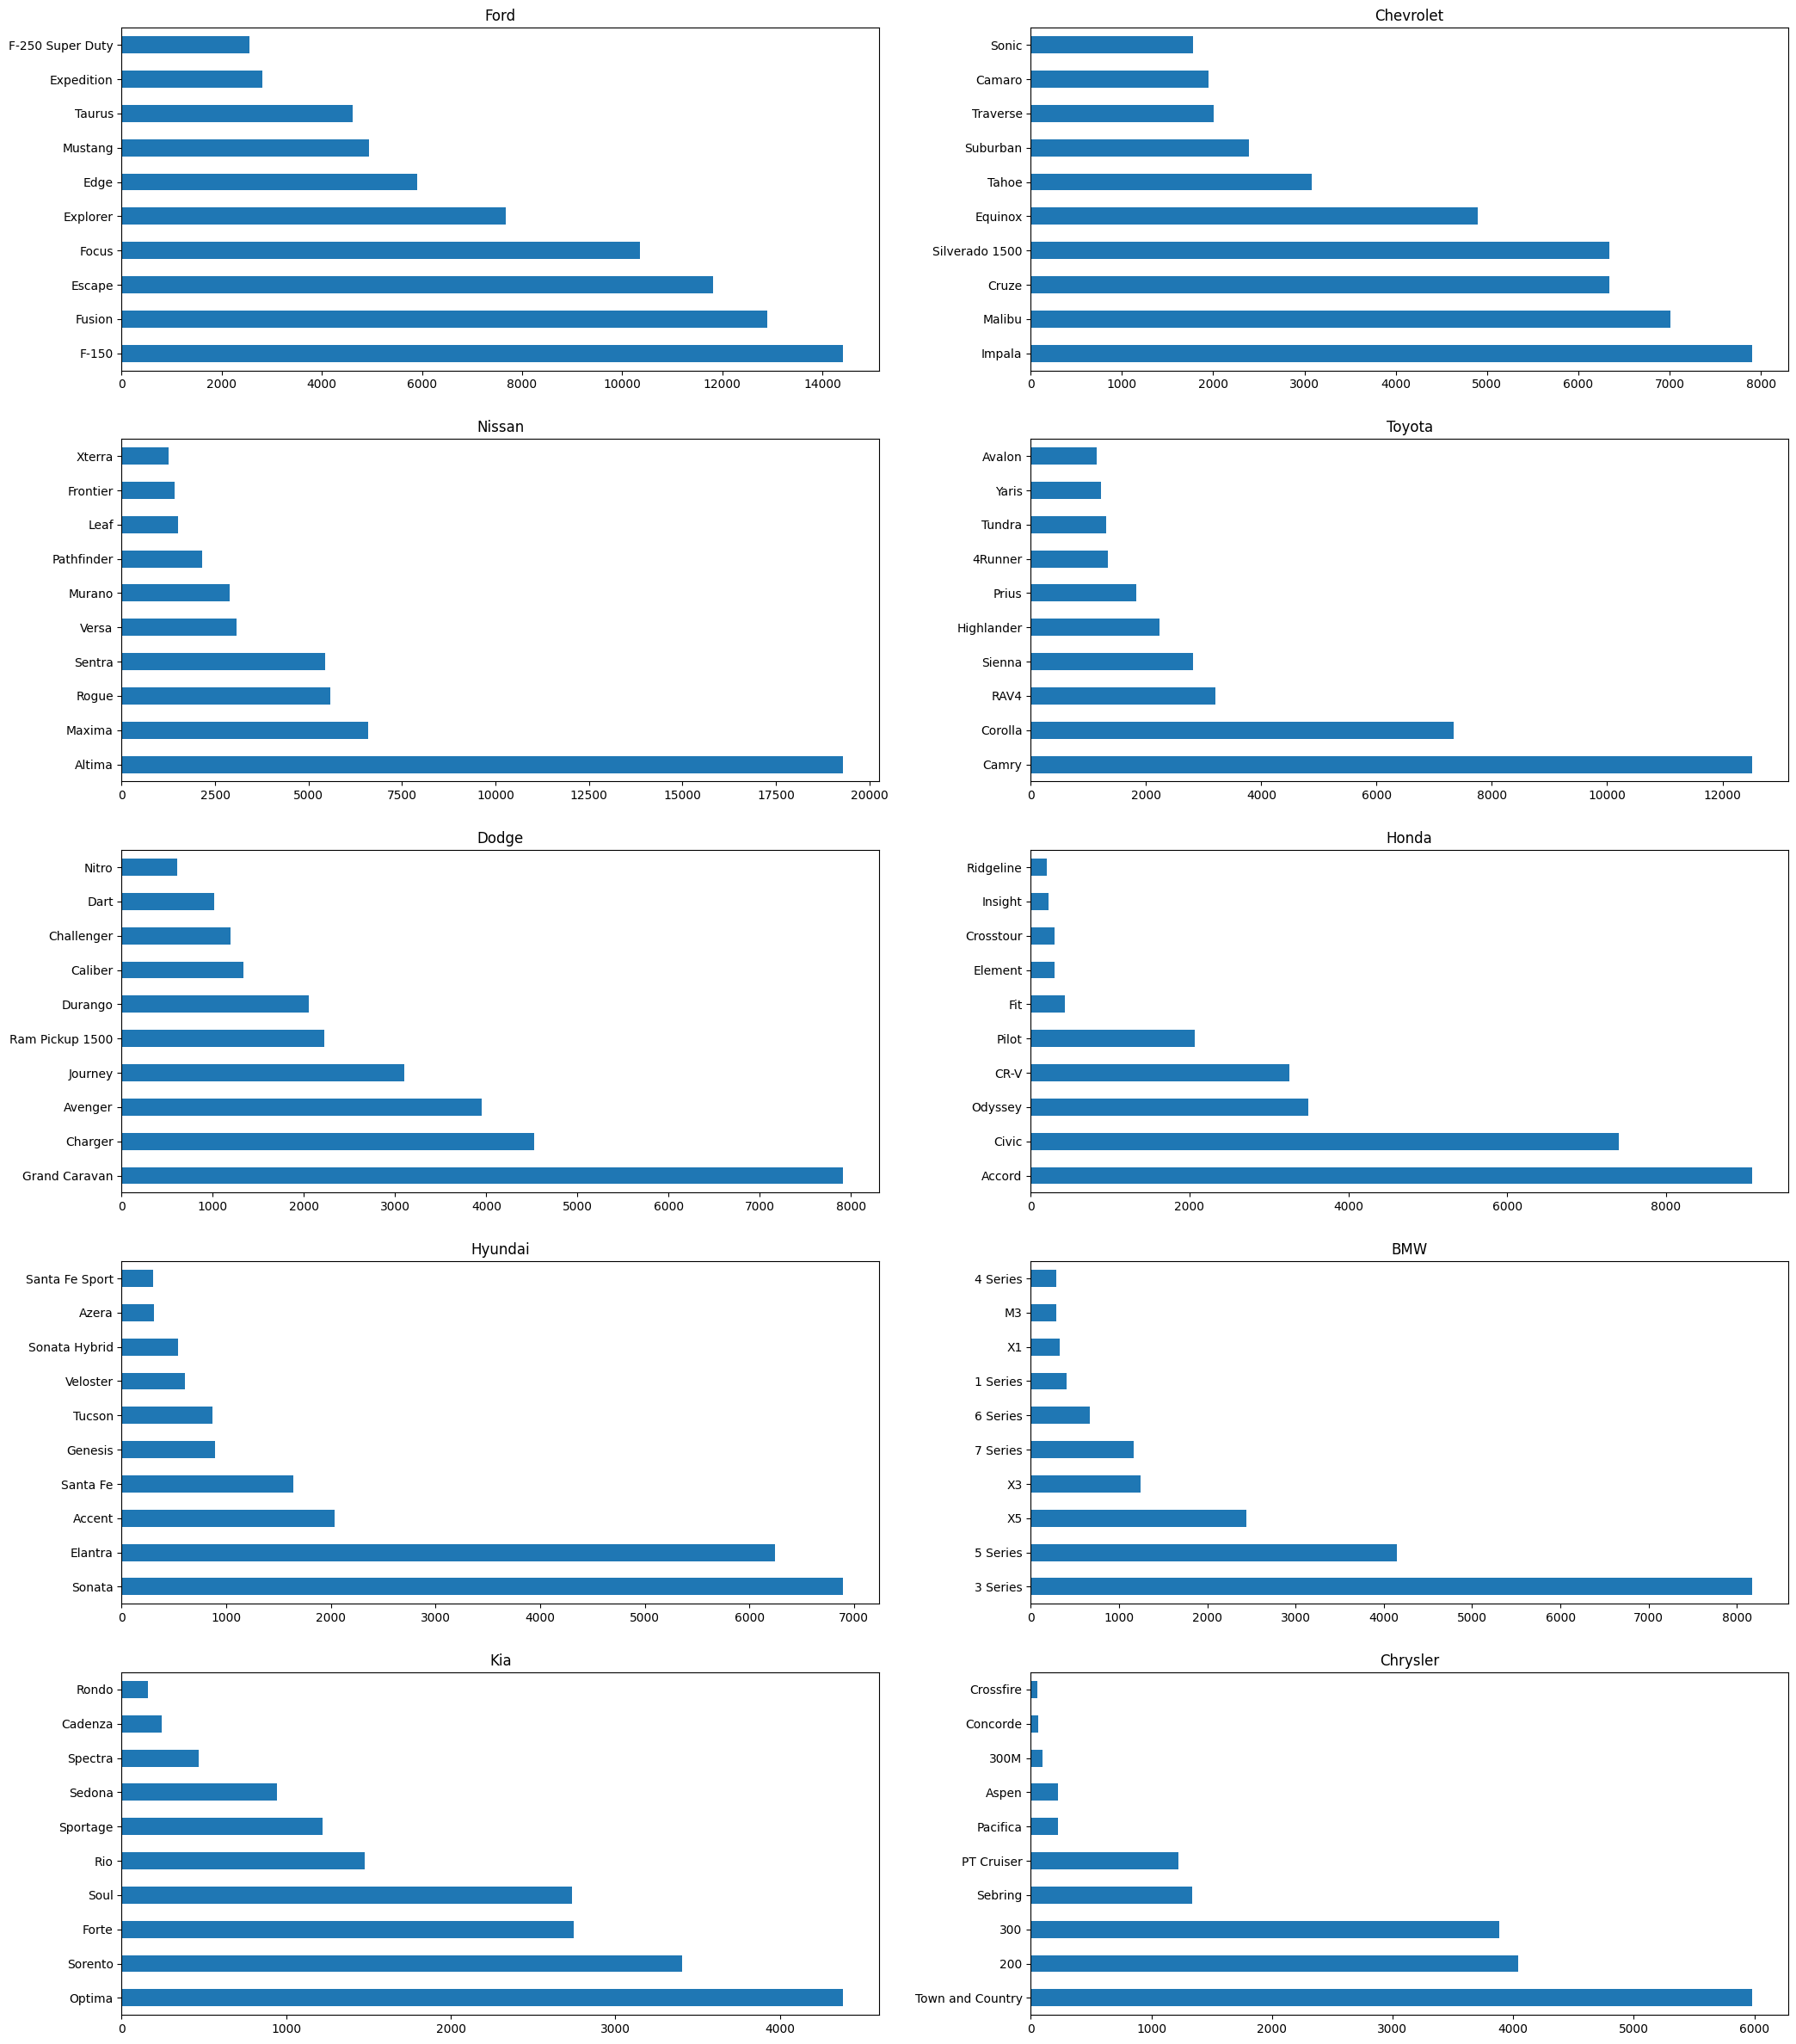

In [19]:
BestSellers = (
    data["vin"]
    .groupby(data["make"])
    .count()
    .sort_values(ascending=False)[:10]
    .index.tolist()
)

plt.figure(figsize=(25, 30))
i = 1
for brand in BestSellers:
    plt.subplot(5, 2, i)
    i += 1
    plt.title(brand)

    model_counts = (
        data["vin"]
        .where(data["make"] == brand)
        .groupby(data["model"])
        .count()
        .sort_values(ascending=False)[:10]
    )

    body = (
        data.loc[data["model"].isin(model_counts.index)]
        .drop_duplicates("model")
        .set_index("model")["body"]
    )

    ax = model_counts.plot(kind="barh")

    ax.set_ylabel("")
plt.show()

<BarContainer object of 38 artists>

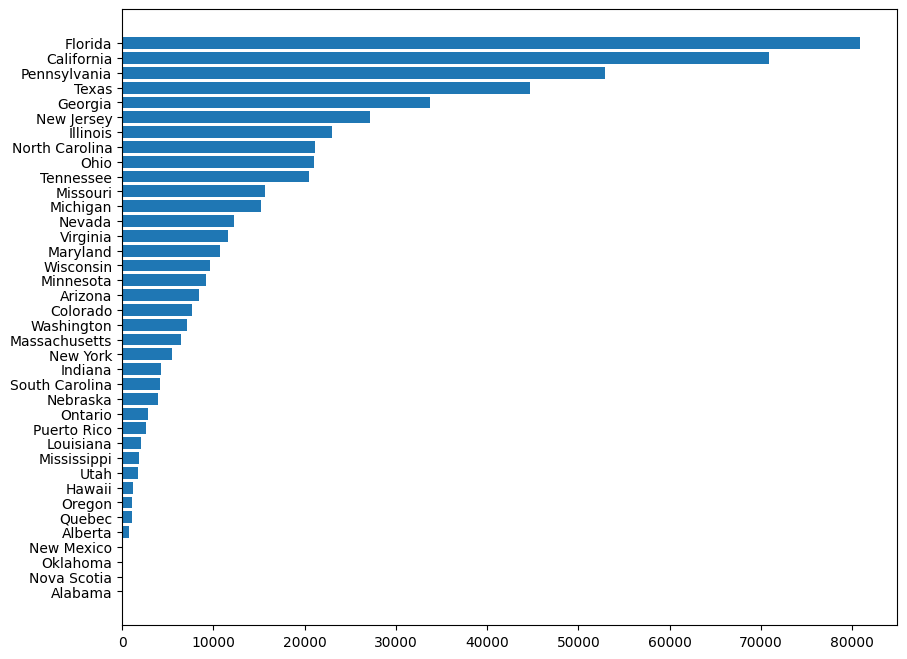

In [20]:
plt.figure(figsize=(10, 8))
salesPerState = data["vin"].groupby(data["state"]).count()

salesPerState = salesPerState.sort_values()
plt.barh(salesPerState.index, width=salesPerState.values)

<BarContainer object of 15 artists>

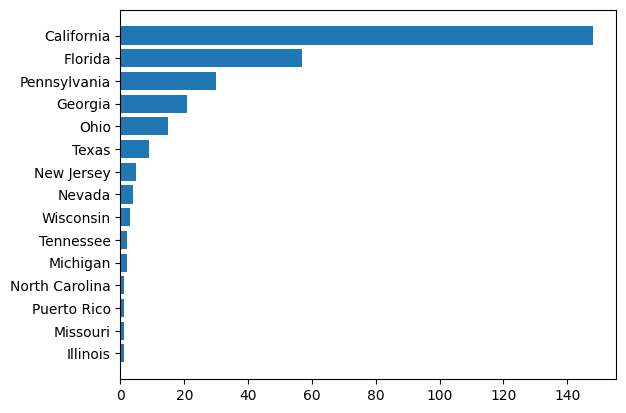

In [21]:
ExpensiveDeals = data.sort_values(by="sellingprice", ascending=False).head(300)
StateWiseExpensiveDeals = ExpensiveDeals["vin"].groupby(ExpensiveDeals["state"]).count()

StateWiseExpensiveDeals = StateWiseExpensiveDeals.sort_values()
plt.barh(StateWiseExpensiveDeals.index, width=StateWiseExpensiveDeals.values)

<Axes: xlabel='condition', ylabel='sellingprice'>

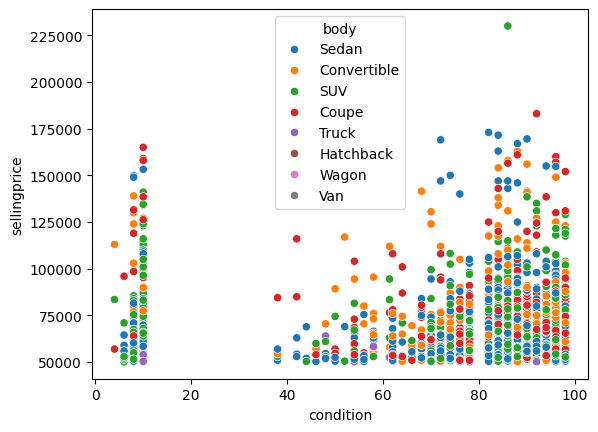

In [22]:
plt.figure()
sns.scatterplot(
    data=data.where(data["sellingprice"] > 50000),
    x="condition",
    y="sellingprice",
    hue="body",
)

There is no such thing that defines how much sellers spend for the vehicles, so I make an assumption that `mmr` defines the price at which the seller got the vehicle.


In [23]:
data["earning"] = data["sellingprice"] - data["mmr"]
maxProfits = int(data["earning"].max())
maxLoss = int(data["earning"].min())
print("Maximum profits: ", maxProfits, "\nMaximum loss: ", maxLoss)

Maximum profits:  207200 
Maximum loss:  -87750


In [25]:
data["saledate"]

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
543197    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
543198    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
543199    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
543200    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
543201    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 543202, dtype: object

In [43]:
data["month"] = data["saledate"].str[3:7]
data["year"] = data["saledate"].str[10:15]

In [45]:
data["month"], data["year"]

(0          Dec
 1          Dec
 2          Jan
 3          Jan
 4          Dec
           ... 
 543197     Jul
 543198     Jul
 543199     Jul
 543200     Jul
 543201     May
 Name: month, Length: 543202, dtype: object,
 0          2014
 1          2014
 2          2015
 3          2015
 4          2014
           ...  
 543197     2015
 543198     2015
 543199     2015
 543200     2015
 543201     2015
 Name: year, Length: 543202, dtype: object)

In [54]:
monthlySales = data[["vin", "month", "year"]].groupby(["year", "month"]).count()

monthlySales

vin
year  month        
      BE S       12
 2014  Dec    51391
       Feb        1
       Jan      195
 2015  Apr     1338
       Feb   158538
       Jan   136645
       Jul     1253
       Jun    97695
       Mar    44998
       May    51136